# TODO: 
* plot mean suicide rate per year globally over time --> this plot looks a bit weird
* think of nice data to correlate with


# Summary
Visualize some overall rates for the different countries

# The data

In [1]:
INPUT_FILE = '../data/processed/enriched_df.csv'
META_DATA = '../data/processed/cleaned_meta.csv'
CHOROPLETH_DATA_FILE = '../data/processed/choropleth_df.csv'
RAW = '../data/raw/who_suicide_statistics.csv'

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [3]:
%load_ext autoreload
%autoreload 2

# Read in data

In [4]:
df = pd.read_csv(CHOROPLETH_DATA_FILE)
df.head()

,year,sex,country,suicides_no,population,"suicides per 100,000",code
0,1979,female,Argentina,508.0,12532000.0,4.05,ARG
1,1979,female,Australia,479.0,6641600.0,7.21,AUS
2,1979,female,Austria,0.0,3742700.0,0.00,AUT
3,1979,female,Bahamas,0.0,95800.0,0.00,BHS
4,1979,female,Barbados,0.0,119800.0,0.00,BRB


In [34]:
df2 = df.copy()
print(len(df2))

7086


In [58]:
df2 = df2.dropna(how="any")  # drop all rows with a nan in it
df2 = df2[df2["population"] != 0]  # drop all zero population rows
counts = df2.groupby(["country"])['year'].agg(['count'])['count'] / 2

# countries wich have data for fewer than 5 years
countries_little_data = list(counts[counts < 5].index)

# remove these countries  from our dataframe
df_filtered = df2[~df2["country"].isin(countries_little_data)]

# get overall rate over all the years
df_overall = df_filtered.groupby(["country"]).agg(population = pd.NamedAgg(column="population", aggfunc=sum), 
                                             suicides_no = pd.NamedAgg(column="suicides_no", aggfunc=sum),
                                              code = pd.NamedAgg(column="code", aggfunc=lambda x: x.iloc[0])).reset_index()

df_overall["suicides per 100,000"] = df_overall['suicides_no'] / df_overall['population'] * 100000 

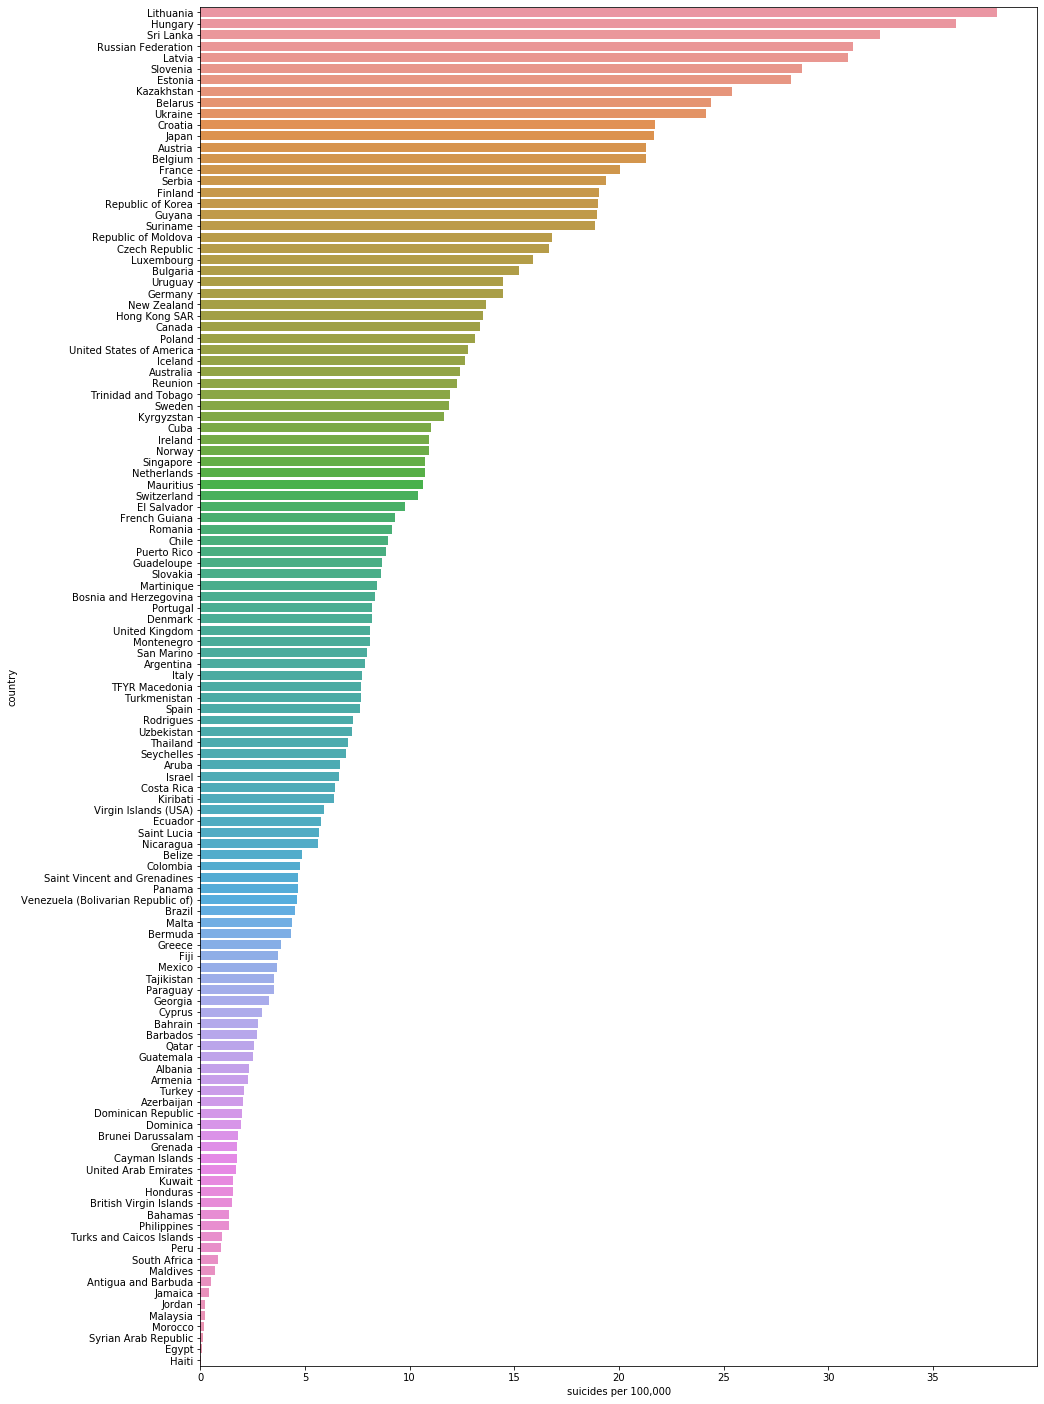

In [59]:
plt.figure(figsize=(15,25))
sns.barplot(x="suicides per 100,000", y="country", orient="h", data=df_overall.sort_values(by="suicides per 100,000", ascending=False))

## Only look at last 5 years

In [44]:
df_filtered.head()

,year,sex,country,suicides_no,population,"suicides per 100,000",code
0,1979,female,Argentina,508.0,12532000.0,4.05,ARG
1,1979,female,Australia,479.0,6641600.0,7.21,AUS
2,1979,female,Austria,0.0,3742700.0,0.00,AUT
3,1979,female,Bahamas,0.0,95800.0,0.00,BHS
4,1979,female,Barbados,0.0,119800.0,0.00,BRB


In [60]:
df_filtered_recent = df_filtered[df_filtered["year"] > 2009]


# get overall rate over all the years
df_recent = df_filtered_recent.groupby(["country"]).agg(population = pd.NamedAgg(column="population", aggfunc=sum), 
                                             suicides_no = pd.NamedAgg(column="suicides_no", aggfunc=sum),
                                              code = pd.NamedAgg(column="code", aggfunc=lambda x: x.iloc[0])).reset_index()

df_recent["suicides per 100,000"] = df_recent['suicides_no'] / df_recent['population'] * 100000 

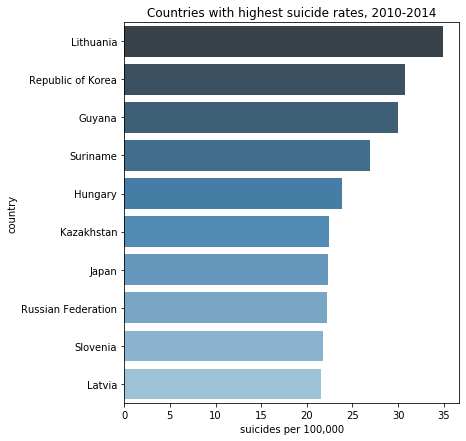

In [81]:
plt.figure(figsize=(6,7))
plt.title("Countries with highest suicide rates, 2010-2014")
sns.barplot(x="suicides per 100,000", y="country", orient="h", data=df_recent.sort_values(by="suicides per 100,000", ascending=False).iloc[:10], palette="Blues_d");

## Global mean suicide rate

In [37]:
df2.head()

,year,sex,country,suicides_no,population,"suicides per 100,000",code
0,1979,female,Argentina,508.0,12532000.0,4.05,ARG
1,1979,female,Australia,479.0,6641600.0,7.21,AUS
2,1979,female,Austria,0.0,3742700.0,0.00,AUT
3,1979,female,Bahamas,0.0,95800.0,0.00,BHS
4,1979,female,Barbados,0.0,119800.0,0.00,BRB


In [38]:
df_global = df2.groupby(["year"]).agg(population = pd.NamedAgg(column="population", aggfunc=sum), 
                                             suicides_no = pd.NamedAgg(column="suicides_no", aggfunc=sum)).reset_index()
df_global["suicides per 100,000"] = df_global['suicides_no'] / df_global['population'] * 100000 

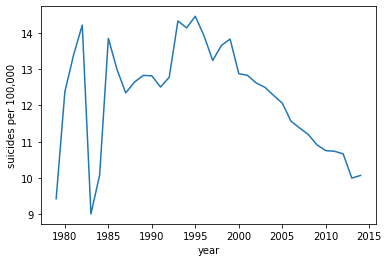

In [39]:
sns.lineplot(x="year", y="suicides per 100,000", data=df_global)

## suicide rates and total population size

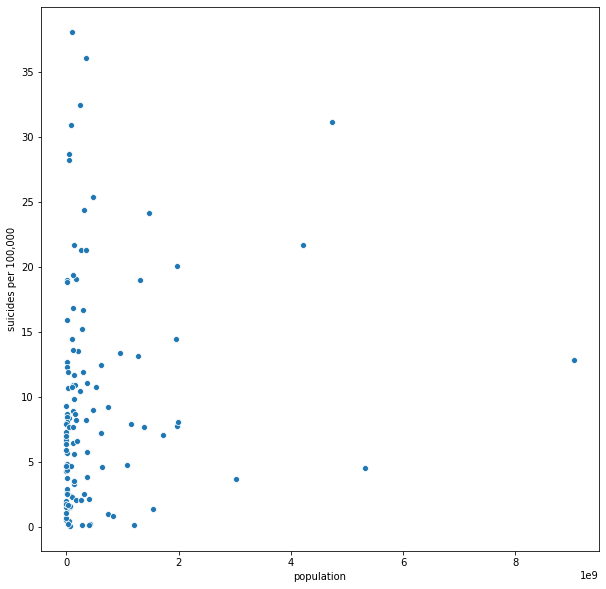

In [75]:
plt.figure(figsize=(10,10))
#plt.xscale('log')
#plt.yscale('log')

sns.scatterplot(x="population", y="suicides per 100,000", data=df_overall)

In [ ]:
# population density 
# sunshine hours
# rainfall

In [24]:
sun_asia = pd.read_csv("../data/raw/asia_sunshine.txt", sep='\t', header=1)

In [25]:
# clean up a bit
sun_asia = sun_asia.drop(columns=["Ref."])

month_cols = sun_asia.columns[2:-1].values

In [26]:
sun_asia.groupby("Country").mean()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Country,,,,,,,,,,,,
Afghanistan,177.200000,178.600000,204.500000,232.500000,310.300000,353.400000,356.800000,339.700000,303.900000,282.600000,253.200000,182.400000
Azerbaijan,89.900000,89.000000,124.000000,195.000000,257.300000,294.000000,313.100000,282.100000,222.000000,145.700000,93.000000,102.300000
Bangladesh,279.000000,226.000000,217.000000,180.000000,155.000000,90.000000,62.000000,62.000000,90.000000,186.000000,240.000000,279.000000
China,136.300000,139.960000,170.360000,198.180000,224.500000,206.000000,217.580000,218.840000,199.560000,188.000000,149.420000,134.280000
Hong Kong,143.000000,94.200000,90.800000,101.700000,140.400000,146.100000,212.000000,188.900000,172.300000,193.900000,180.100000,172.200000
India,237.500000,230.725000,252.550000,259.275000,256.850000,151.300000,111.100000,117.950000,161.075000,216.275000,218.450000,221.100000
Indonesia,189.100000,180.800000,238.700000,255.000000,260.400000,255.000000,282.100000,294.500000,300.700000,279.000000,231.000000,217.000000
Iran,137.200000,151.100000,186.000000,219.100000,279.800000,328.700000,336.600000,336.800000,300.500000,246.800000,169.400000,134.100000
Iraq,192.200000,203.300000,244.900000,255.000000,300.700000,348.000000,347.200000,353.400000,315.000000,272.800000,213.000000,195.300000


In [21]:
sun_asia

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,total
0,Bangladesh,Dhaka,279.0,226.0,217.0,180.0,155.0,90.0,62.0,62.0,90.0,186.0,240.0,279.0,"2,066",2066.0
1,Thailand,Chiang Mai,272.8,257.1,294.5,279.0,198.4,156.0,120.9,117.8,144.0,201.5,216.0,254.2,"2,512.2",2512.2
2,Thailand,Bangkok,272.5,249.9,269.0,256.7,216.4,178.0,171.8,160.3,154.9,198.1,234.2,262.0,"2,623.8",2623.8
3,Pakistan,Karachi,270.7,249.4,271.6,277.4,299.1,231.8,155.0,147.7,218.8,283.5,273.3,272.0,"2,950.3",2950.3
4,India,Mumbai,269.5,257.6,274.3,283.7,296.2,148.6,73.4,75.9,165.1,240.2,245.8,253.2,"2,583.5",2583.5
5,Oman,Muscat,268.6,244.8,278.3,292.5,347.4,325.7,277.7,278.6,303.9,316.9,291.9,267.0,"3,493.3",3493.3
6,Saudi Arabia,Abha,266.6,265.6,294.5,282.0,288.3,276.0,232.5,238.7,273.0,291.4,273.0,266.6,"3,248.2",3248.2
7,India,Bangalore,262.0,248.0,271.0,257.0,241.0,137.0,112.0,114.0,144.0,173.0,190.0,212.0,"2,361.0",2361.0
8,Vietnam,Da Lat,255.0,234.0,255.0,202.0,190.0,147.0,157.0,136.0,133.0,140.0,172.0,215.0,"2,238",2236.0
9,United Arab Emirates,Dubai,254.2,229.6,254.2,294.0,344.1,342.0,322.4,316.2,309.0,303.8,285.0,254.2,"3,508.7",3508.7


In [27]:
#http://hdr.undp.org/en/content/human-development-index-hdi

In [68]:
data = pd.read_excel("../data/raw/2018_all_indicators.xlsx")
data.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


In [69]:
data = data.drop(columns=["indicator_id", "dimension", 9999, "country_name"], axis=1)
data = data.rename({"iso3": "code"}, axis=1)

In [39]:
#data["indicator_name"].unique()

We have 26 years, 1990 - 2017

In [70]:
data.head()

,indicator_name,code,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,HDI rank,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0
1,HDI rank,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0
2,HDI rank,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0
3,HDI rank,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0
4,HDI rank,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0


In [71]:
data["num_nulls"] = data.isnull().sum(axis=1)

In [72]:
list(data.sort_values(by="num_nulls")["indicator_name"].drop_duplicates(keep="first")[:40])

['Life expectancy index',
 'Mean years of schooling, male (years)',
 'Exports and imports (% of GDP)',
 'Mean years of schooling, female (years)',
 'Mean years of schooling (years)',
 'Population with at least some secondary education, male (% ages 25 and older)',
 'Population with at least some secondary education, female (% ages 25 and older)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Income index',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Expected years of schooling, male (years)',
 'Expected years of schooling, female (years)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Infants lacking immunization, DPT (% of one-year-olds)',
 'Life expectancy at birth (years)',
 'Private capital flows (% of GDP)',
 'Remittances, inflows (% of GDP)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, female (years)',
 'Urban population (%)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
 'Population 

In [73]:
use = ["Mean years of schooling, male (years)", "Mean years of schooling, female (years)", 
      "Population with at least some secondary education, male (% ages 25 and older)", 
      "Expected years of schooling (years)",
     "Population with at least some secondary education, female (% ages 25 and older)", 
     "Gross national income (GNI) per capita (2011 PPP $)", 
     "Infants lacking immunization, measles (% of one-year-olds)", 
     "Life expectancy at birth (years)", 
     "Urban population (%)", 
     "Education index", 
     "Human Development Index (HDI)",
     "Mortality rate, under-five (per 1,000 live births)",
      "Estimated gross national income per capita, female (2011 PPP $)", 
      "Estimated gross national income per capita, male (2011 PPP $)", 
      "Human Development Index (HDI), female", 
      "Human Development Index (HDI), male", 
      "Gender Development Index (GDI)"]

In [74]:
# pick out a set of statistics
# decide whether can linearly interpolate or not
# impute missing values

In [75]:
data2 = data[data["indicator_name"].isin(use)]

In [76]:
data2.columns

Index(['indicator_name',           'code',             1990,             1991,
                   1992,             1993,             1994,             1995,
                   1996,             1997,             1998,             1999,
                   2000,             2001,             2002,             2003,
                   2004,             2005,             2006,             2007,
                   2008,             2009,             2010,             2011,
                   2012,             2013,             2014,             2015,
                   2016,             2017,      'num_nulls'],
      dtype='object')

In [79]:
years = np.arange(1990, 2017+1)

### Interpolate

In [84]:
test = data2.copy()

In [85]:
test[years] = test[years].interpolate(axis=1, limit_area="inside")

In [108]:
test[years] = test[years].interpolate(axis=1, limit_direction="both", method="linear")

In [105]:
test.loc[test["num_nulls_after"] != test["num_nulls"]]

,indicator_name,code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,num_nulls,num_nulls_after
228,Human Development Index (HDI),COD,0.356,0.353,0.346500,0.340000,0.334000,0.333000,0.337000,0.334000,...,0.407000,0.415,0.420000,0.426000,0.436,0.444000,0.452000,0.457,1,0
264,Human Development Index (HDI),HUN,0.704,0.701,0.710000,0.719000,0.733000,0.741000,0.746000,0.747000,...,0.823000,0.827,0.830000,0.835000,0.833,0.834000,0.835000,0.838,1,0
276,Human Development Index (HDI),KAZ,0.690,0.684,0.679500,0.675000,0.667000,0.664000,0.666000,0.669000,...,0.765000,0.772,0.781000,0.788000,0.793,0.797000,0.797000,0.800,1,0
2361,Expected years of schooling (years),MHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.673333,12.720,12.766667,12.813333,12.860,12.906667,12.953333,13.000,26,12
4187,"Mean years of schooling, female (years)",MHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.700,10.700000,10.700000,10.700,10.700000,10.700000,10.700,26,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16012,Gross national income (GNI) per capita (2011 P...,COD,1285.000,1135.000,984.000000,833.000000,729.000000,696.000000,725.000000,664.000000,...,635.000000,648.000,666.000000,669.000000,713.000,750.000000,792.000000,796.000,1,0
16030,Gross national income (GNI) per capita (2011 P...,ETH,648.000,581.000,589.166667,597.333333,605.500000,613.666667,621.833333,630.000000,...,1072.000000,1160.000,1228.000000,1323.000000,1421.000,1527.000000,1603.000000,1719.000,5,0
16048,Gross national income (GNI) per capita (2011 P...,HUN,16107.000,14012.000,14093.500000,14175.000000,14589.000000,14745.000000,14697.000000,14972.000000,...,21248.000000,21674.000,21580.000000,22398.000000,23034.000,23740.000000,24337.000000,25393.000,1,0
16060,Gross national income (GNI) per capita (2011 P...,KAZ,13734.000,12230.000,11411.500000,10593.000000,9368.000000,8735.000000,8893.000000,9160.000000,...,17925.000000,18215.000,19163.000000,21007.000000,21699.000,23164.000000,22054.000000,22626.000,1,0


In [104]:
data2.loc[test["num_nulls_after"] != test["num_nulls"]]

,indicator_name,code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,num_nulls
228,Human Development Index (HDI),COD,0.356,0.353,NaN,0.340,0.334,0.333,0.337,0.334,...,0.397,0.407,0.415,0.420,0.426,0.436,0.444,0.452,0.457,1
264,Human Development Index (HDI),HUN,0.704,0.701,NaN,0.719,0.733,0.741,0.746,0.747,...,0.818,0.823,0.827,0.830,0.835,0.833,0.834,0.835,0.838,1
276,Human Development Index (HDI),KAZ,0.690,0.684,NaN,0.675,0.667,0.664,0.666,0.669,...,0.763,0.765,0.772,0.781,0.788,0.793,0.797,0.797,0.800,1
2361,Expected years of schooling (years),MHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000,26
4187,"Mean years of schooling, female (years)",MHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.700,NaN,NaN,NaN,NaN,NaN,10.700,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16012,Gross national income (GNI) per capita (2011 P...,COD,1285.000,1135.000,NaN,833.000,729.000,696.000,725.000,664.000,...,614.000,635.000,648.000,666.000,669.000,713.000,750.000,792.000,796.000,1
16030,Gross national income (GNI) per capita (2011 P...,ETH,648.000,581.000,NaN,NaN,NaN,NaN,NaN,630.000,...,979.000,1072.000,1160.000,1228.000,1323.000,1421.000,1527.000,1603.000,1719.000,5
16048,Gross national income (GNI) per capita (2011 P...,HUN,16107.000,14012.000,NaN,14175.000,14589.000,14745.000,14697.000,14972.000,...,21079.000,21248.000,21674.000,21580.000,22398.000,23034.000,23740.000,24337.000,25393.000,1
16060,Gross national income (GNI) per capita (2011 P...,KAZ,13734.000,12230.000,NaN,10593.000,9368.000,8735.000,8893.000,9160.000,...,17677.000,17925.000,18215.000,19163.000,21007.000,21699.000,23164.000,22054.000,22626.000,1


In [98]:
data2.isnull().sum().sum()

16792

In [110]:
# pivot
test = pd.melt(test, id_vars=["code", "indicator_name"], var_name='year', value_name='value')

In [111]:
test.head()

,code,indicator_name,year,value
0,AFG,Human Development Index (HDI),1990,0.373
1,ALB,Human Development Index (HDI),1990,0.645
2,DZA,Human Development Index (HDI),1990,0.577
3,AND,Human Development Index (HDI),1990,0.759
4,AGO,Human Development Index (HDI),1990,0.374


In [123]:
test2 = test.copy()
test2 = test2.head(100)

In [124]:
test2.head()

,code,indicator_name,year,value
0,AFG,Human Development Index (HDI),1990,0.373
1,ALB,Human Development Index (HDI),1990,0.645
2,DZA,Human Development Index (HDI),1990,0.577
3,AND,Human Development Index (HDI),1990,0.759
4,AGO,Human Development Index (HDI),1990,0.374


In [122]:
test2.pivot(index="code", values="value", columns="indicator_name").reset_index()

indicator_name,code,Human Development Index (HDI)
0,AFG,0.373
1,AGO,0.374
2,ALB,0.645
3,AND,0.759
4,ARG,0.704
...,...,...
95,LSO,0.499
96,LVA,0.704
97,SLV,0.529
98,SWZ,0.536


In [116]:
# pivot
test.pivot(columns="indicator_name", values="value")

indicator_name,Education index,"Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Expected years of schooling (years),Gender Development Index (GDI),Gross national income (GNI) per capita (2011 PPP $),Human Development Index (HDI),"Human Development Index (HDI), female","Human Development Index (HDI), male","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),"Mean years of schooling, female (years)","Mean years of schooling, male (years)","Mortality rate, under-five (per 1,000 live births)","Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Urban population (%)
0,NaN,NaN,NaN,NaN,NaN,NaN,0.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92125,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92126,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92127,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92128,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fuse with other dataframe

In [ ]:
pd.merge(df, test, on=["code", "year"])